Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [8]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
import pathlib

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")


In [10]:

print("Training directory exists:", data_dir_train.exists())
print("Test directory exists:", data_dir_test.exists())

# List contents
print("Training contents:", list(data_dir_train.glob('*')))
print("Test contents:", list(data_dir_test.glob('*')))


Training directory exists: True
Test directory exists: True
Training contents: [WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis'), WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma'), WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma'), WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma'), WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus'), WindowsPath('C:/Users/melvi/OneDrive/Desktop/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis'), WindowsPath('C:/Users/melvi/OneDrive/D

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [13]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [14]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [15]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

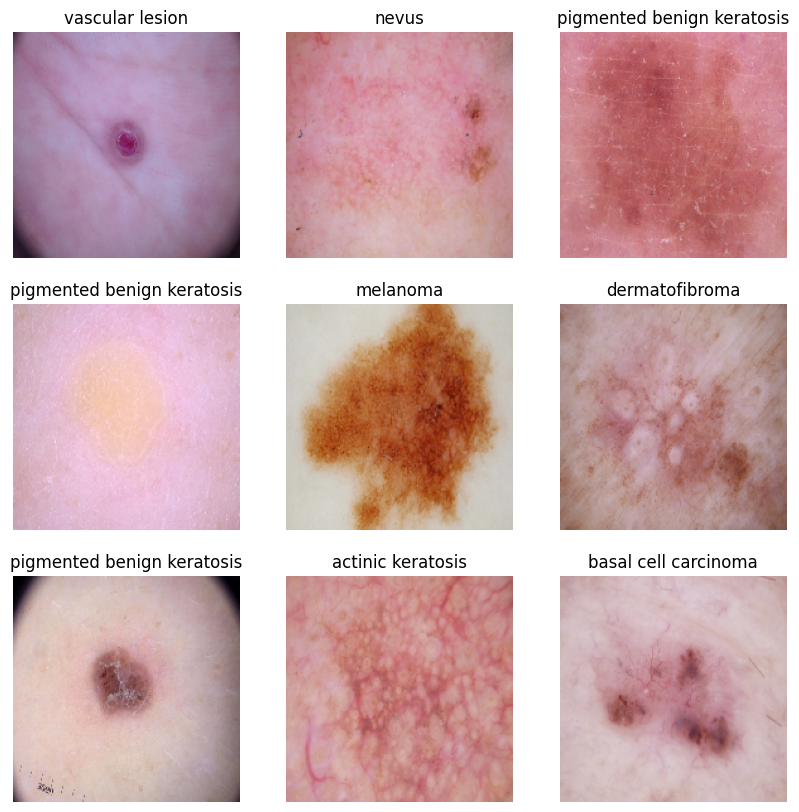

In [16]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
### Your code goes here
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D
target_labels = 9

model = Sequential([
   Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])


c:\Users\melvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.1821 - loss: 2.0964 - val_accuracy: 0.2528 - val_loss: 1.9402
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.3172 - loss: 1.8959 - val_accuracy: 0.3736 - val_loss: 1.8202
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.3822 - loss: 1.7111 - val_accuracy: 0.4653 - val_loss: 1.5307
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 234ms/step - accuracy: 0.4898 - loss: 1.4495 - val_accuracy: 0.5213 - val_loss: 1.3806
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 230ms/step - accuracy: 0.5499 - loss: 1.2834 - val_accuracy: 0.5459 - val_loss: 1.3239
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.5833 - loss: 1.1796 - val_accuracy: 0.5145 - val_loss: 1.4506
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.5665 - loss: 1.1735 - val_accuracy: 0.5190 - val_loss: 1.5186
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.6353 - loss: 1.0546 - val_accu

### Visualizing training results

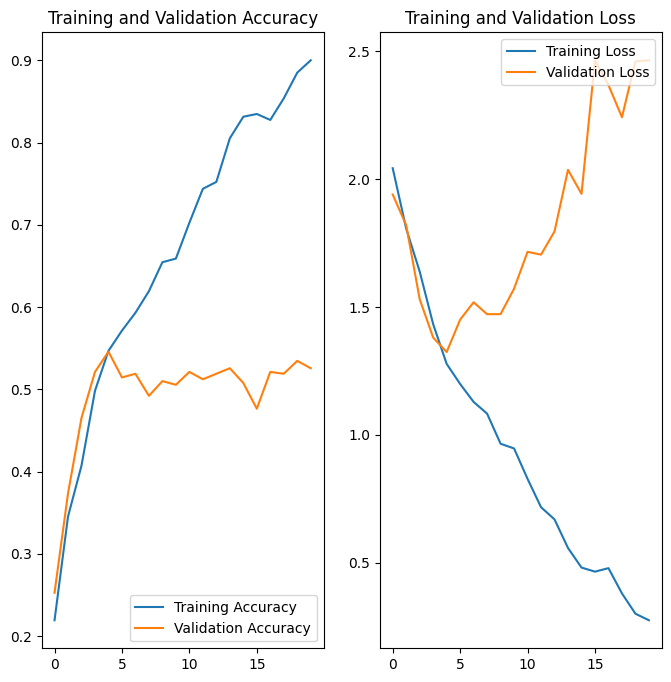

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here


The model's training accuracy steadily increases, reaching up to 90%, while the validation accuracy remains consistently around 55%.

The high training accuracy indicates that the model has effectively learned the patterns in the training data, but the low validation accuracy suggests poor generalization to unseen data.

These patterns confirm the presence of overfitting.

To mitigate overfitting, data augmentation techniques will be applied. Given the limited training dataset, new samples will be created by making slight modifications to the existing data, such as horizontal/vertical flipping, small rotations, and other minor transformations. These augmented samples will be incorporated into the training process to improve the model's ability to generalize.

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

augmentation_data = Sequential([
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

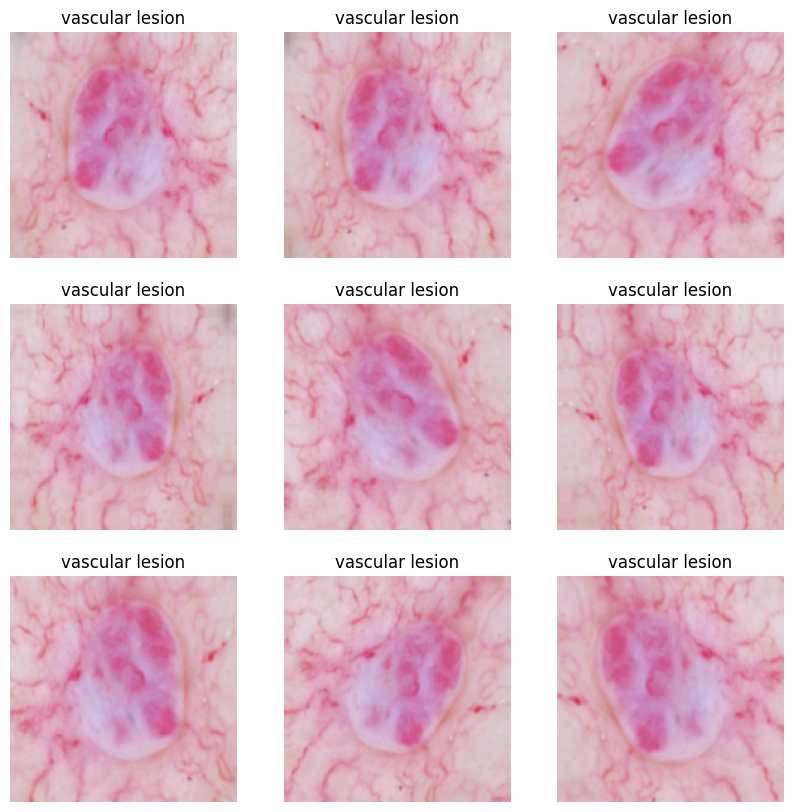

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D

model = Sequential([
    augmentation_data,  # Assuming this is correctly defined earlier
    Rescaling(1./255),
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    # Add other layers as needed

  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compiling the model

In [26]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [27]:

## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.2392 - loss: 2.0559 - val_accuracy: 0.3468 - val_loss: 1.7606
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.4106 - loss: 1.6380 - val_accuracy: 0.4877 - val_loss: 1.5319
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.4764 - loss: 1.4833 - val_accuracy: 0.5190 - val_loss: 1.4350
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.5193 - loss: 1.3743 - val_accuracy: 0.5302 - val_loss: 1.3528
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.5240 - loss: 1.3132 - val_accuracy: 0.5190 - val_loss: 1.3726
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.5036 - loss: 1.3370 - val_accuracy: 0.5257 - val_loss: 1.3971
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - accuracy: 0.5366 - loss: 1.2711 - val_accuracy: 0.5459 - val_loss: 1.3442
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.5584 - loss: 1.1895 - val_accu

### Visualizing the results

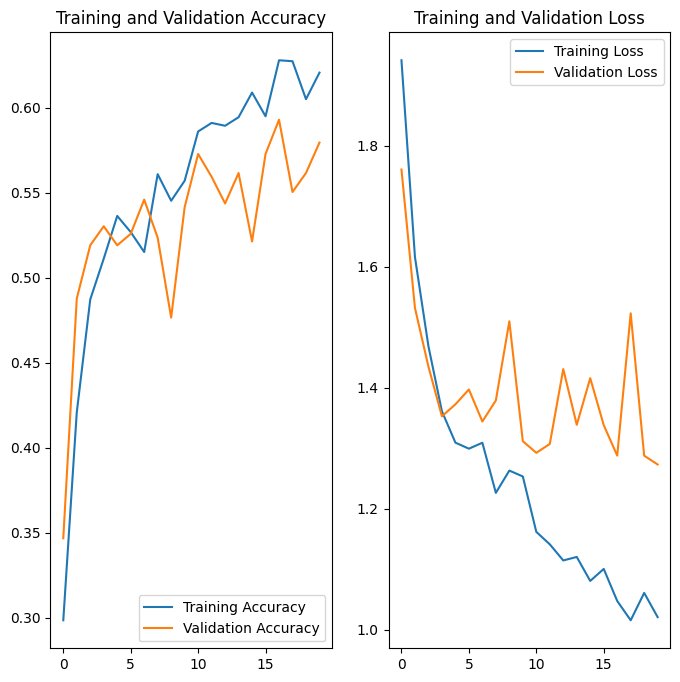

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Observations:

The use of augmented data has successfully mitigated overfitting.

The training and validation accuracies are now closely aligned.

However, both the training and validation datasets are showing low performance, indicating that the model is now underfitting.

In [29]:
## Your code goes here.
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))

2239


In [30]:
image_dict = dict(zip(images_path_list, lesions_list))
print(list(image_dict.items())[:5])

[('C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis'), ('C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'actinic keratosis'), ('C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'actinic keratosis'), ('C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg', 'actinic keratosis')]


In [31]:
# View the image path and class label in a df
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df.head()

,Image Path,Label
0,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
1,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
2,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
3,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
4,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis


In [32]:
## Inspecting the distribution of classes in the data
lesions_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

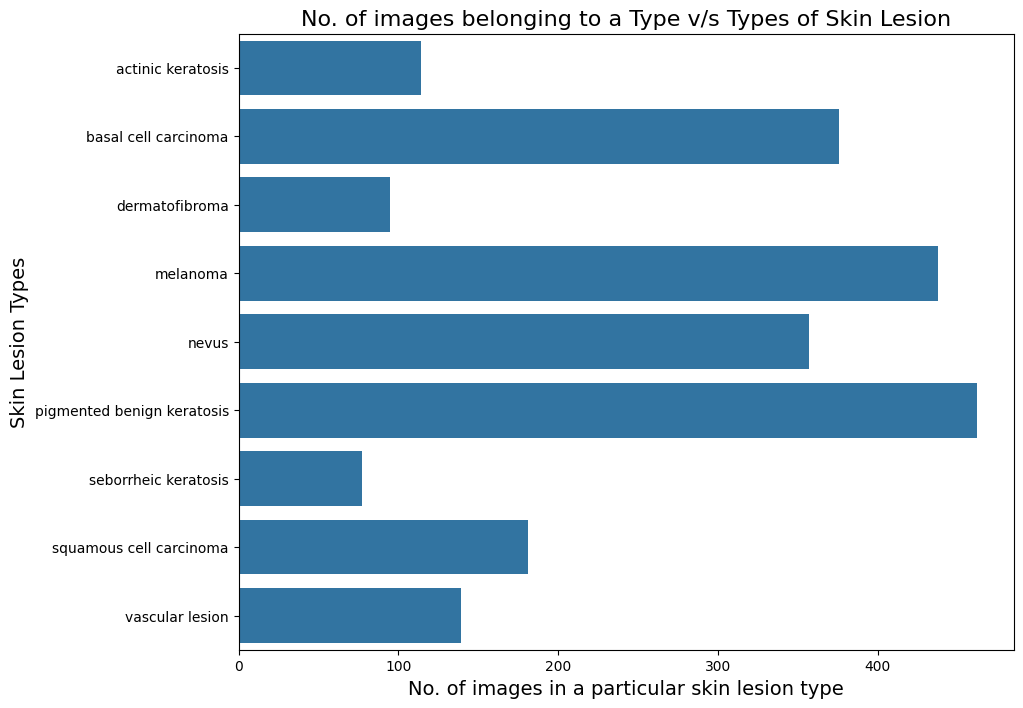

In [33]:
# Visualize the distribution of classes using a countplot

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [34]:
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

Label                     
pigmented benign keratosis    20.63
melanoma                      19.56
basal cell carcinoma          16.79
nevus                         15.94
squamous cell carcinoma        8.08
vascular lesion                6.21
actinic keratosis              5.09
dermatofibroma                 4.24
seborrheic keratosis           3.44
Name: proportion, dtype: float64

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Observations:

A clear class imbalance is evident within the training data.

The class "seborrheic keratosis" comprises the smallest proportion of samples, accounting for approximately 3.44%.

"Pigmented benign keratosis" and "melanoma" significantly outweigh other classes, representing approximately 20.63% and 19.56% of the data, respectively.



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x178C5A511F0>: 100%|██████████| 500/500 [00:02<00:00, 249.07 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x178C59D8C20>: 100%|██████████| 500/500 [00:02<00:00, 235.30 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x178C59B8CE0>: 100%|██████████| 500/500 [00:02<00:00, 241.22 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x178C5914440>: 100%|██████████| 500/500 [00:11<00:00, 43.95 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x178C55A9C70>: 100%|██████████| 500/500 [00:09<00:00, 51.77 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x178C5916DE0>: 100%|██████████| 500/500 [00:01<00:00, 282.21 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x178C597E4B0>: 100%|██████████| 500/500 [00:04<00:00, 124.31 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x178C5916660>: 100%|██████████| 500/500 [00:01<00:00, 252.37 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\melvi\OneDrive\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x178C59ED670>: 100%|██████████| 500/500 [00:02<00:00, 247.46 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
# Verifying the total count of images after the augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
# extracting the augmented image paths in a list
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_082f46cc-cce4-4a7d-9e59-3b2e417ee7f4.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_43248805-6044-4cae-a987-2fc3b4ac2015.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_92383f14-5206-4611-b2f3-a775fe05bf09.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9ebe5cc3-5777-4b08-a893-104b718c5e72.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_a

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [40]:
# extracting the augmented image paths in a list
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_082f46cc-cce4-4a7d-9e59-3b2e417ee7f4.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_43248805-6044-4cae-a987-2fc3b4ac2015.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_92383f14-5206-4611-b2f3-a775fe05bf09.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9ebe5cc3-5777-4b08-a893-104b718c5e72.jpg',
 'C:\\Users\\melvi\\OneDrive\\Desktop\\CNN_a

In [41]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = pd.concat([lesions_df, df2], ignore_index=True)
new_df.shape

(6739, 2)

In [43]:
# View the augmented image paths and labels in a new df
new_df.head()

,Image Path,Label
0,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
1,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
2,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
3,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis
4,C:\Users\melvi\OneDrive\Desktop\CNN_assignment...,actinic keratosis


In [44]:
# Inspecting the classes after adding 500 samples per label
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

In [45]:
# Inspecting the classes (% age wise) after adding 500 samples per label
round(new_df['Label'].value_counts(normalize=True)*100, 2)

Label
pigmented benign keratosis    14.28
melanoma                      13.92
basal cell carcinoma          13.00
nevus                         12.72
squamous cell carcinoma       10.11
vascular lesion                9.48
actinic keratosis              9.11
dermatofibroma                 8.83
seborrheic keratosis           8.56
Name: proportion, dtype: float64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [47]:
# data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [49]:
## your code goes here
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, BatchNormalization

model = Sequential([
    augmentation_data,  # Assuming this is defined earlier
    Rescaling(1./255),  # Replace experimental.preprocessing with tf.keras.layers.Rescaling
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [50]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [51]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 104s 595ms/step - accuracy: 0.2733 - loss: 3.5167 - val_accuracy: 0.0846 - val_loss: 32.9919
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 96s 569ms/step - accuracy: 0.3849 - loss: 1.6684 - val_accuracy: 0.1596 - val_loss: 17.0706
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 97s 574ms/step - accuracy: 0.4479 - loss: 1.4568 - val_accuracy: 0.3823 - val_loss: 1.8375
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 99s 586ms/step - accuracy: 0.4648 - loss: 1.3676 - val_accuracy: 0.4603 - val_loss: 1.5196
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 96s 565ms/step - accuracy: 0.4852 - loss: 1.3219 - val_accuracy: 0.4618 - val_loss: 1.3807
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 99s 584ms/step - accuracy: 0.4953 - loss: 1.2578 - val_accuracy: 0.4714 - val_loss: 1.3504
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 96s 568ms/step - accuracy: 0.5029 - loss: 1.2314 - val_accuracy: 0.4900 - val_loss: 1.3496
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 95s 563ms/step - accuracy: 0.5223 - loss

#### **Todo:**  Visualize the model results

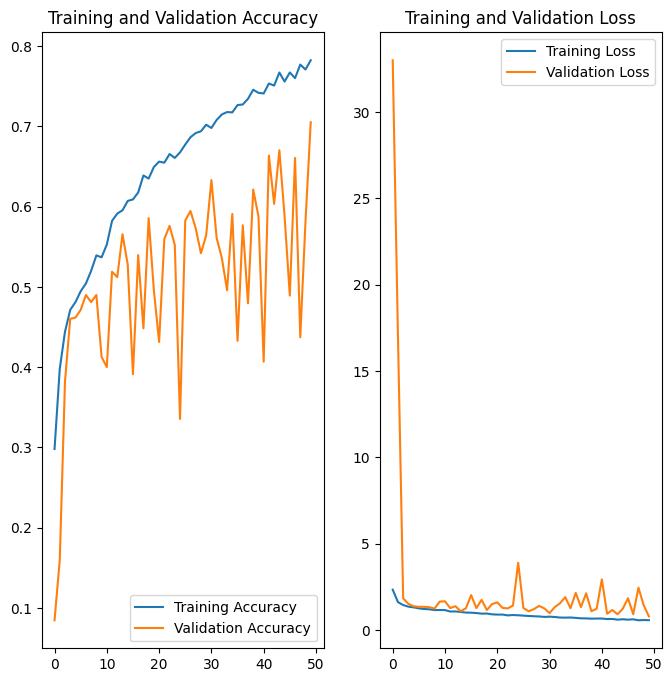

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Creating another model (without batch normalization)

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create the model
model = Sequential([
    augmentation_data,
    Rescaling(1.0 / 255),  # Corrected usage
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(target_labels)  # Ensure `target_labels` is defined correctly
])


Compiling the model

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ModelCheckpoint callback is employed alongside the model.fit() training process to periodically save the model
# or its weights (in a checkpoint file)
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

In [55]:
#
# Training the model

In [56]:
# train the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystop]
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.2093 - loss: 2.1190
Epoch 1: val_accuracy improved from -inf to 0.40312, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 266ms/step - accuracy: 0.2097 - loss: 2.1177 - val_accuracy: 0.4031 - val_loss: 1.5156
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.4154 - loss: 1.5405
Epoch 2: val_accuracy improved from 0.40312 to 0.46993, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 265ms/step - accuracy: 0.4154 - loss: 1.5404 - val_accuracy: 0.4699 - val_loss: 1.4077
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.4622 - loss: 1.4215
Epoch 3: val_accuracy improved from 0.46993 to 0.47661, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.4622 - loss: 1.4215 - val_accuracy: 0.4766 - val_loss: 1.3929
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.4836 - loss: 1.3580
Epoch 4: val_accuracy improved from 0.4

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,969,405 (45.66 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,604 (30.44 MB)

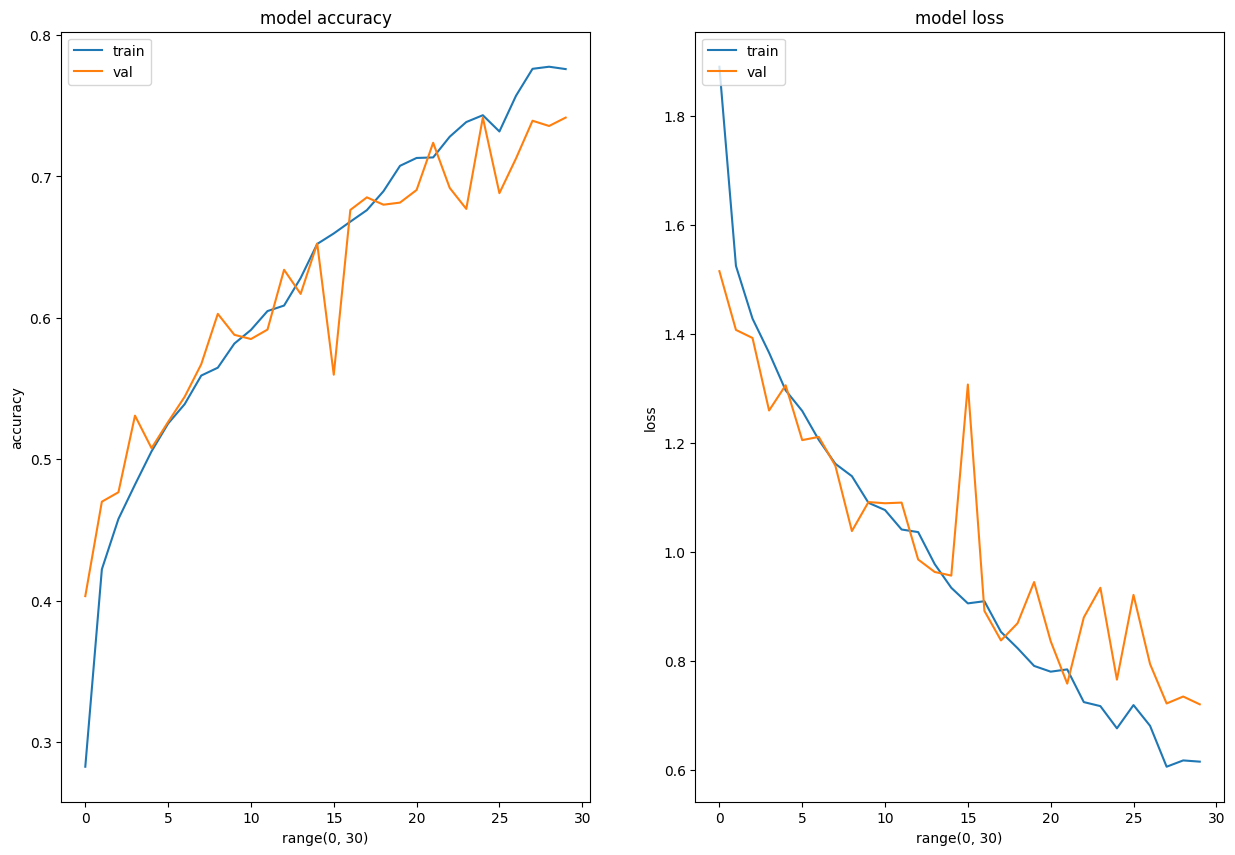

In [58]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Observations:

The final model demonstrates a well-balanced performance, with no evidence of underfitting or overfitting.

Incorporating class rebalancing significantly improved the model's accuracy on both the training and validation datasets.

After 37 epochs, the model achieved 84% accuracy on the training set and approximately 79% on the validation set.

The small gap between training and validation accuracies highlights the strong generalization ability of the final CNN model.

Adding batch normalization did not lead to any improvement in training or validation accuracy.







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Actual Class: basal cell carcinoma
Predicted Class: dermatofibroma


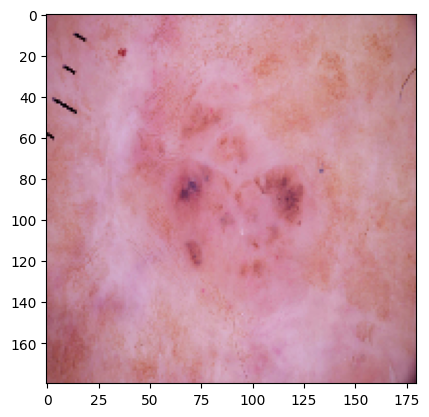

In [59]:
# Evaluating our model on one of the instances in the test set

from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)